# Importing the basic necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Extracting the data

In [2]:
data = pd.read_csv("D:/KNN_Projects/iphone_purchase_records.csv")

In [3]:
data.head(2)

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0


In [4]:
data.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

# Preprocessing the Data

In [5]:
df = data.copy()

In [6]:
df

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [8]:
# No null values

In [9]:
# Since gender is an object, we have to convert this textual column to numerical column
# using one Hot encoding

In [10]:
dumm = pd.get_dummies(df['Gender']).astype('int')

In [11]:
dumm

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [12]:
# Concating this with my dataset
df1 = pd.concat([df, dumm], axis=1)

In [13]:
df1

,Gender,Age,Salary,Purchase Iphone,Female,Male
0,Male,19,19000,0,0,1
1,Male,35,20000,0,0,1
2,Female,26,43000,0,1,0
3,Female,27,57000,0,1,0
4,Male,19,76000,0,0,1
...,...,...,...,...,...,...
395,Female,46,41000,1,1,0
396,Male,51,23000,1,0,1
397,Female,50,20000,1,1,0
398,Male,36,33000,0,0,1


# Pattern Analysis/EDA

# Correlation Heatmap

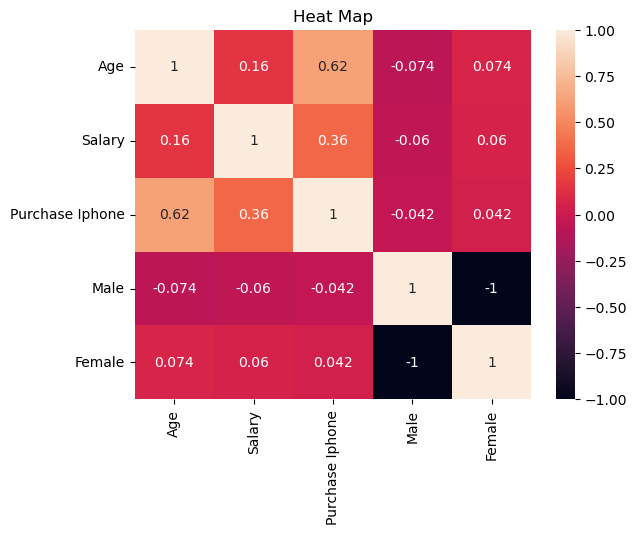

In [15]:
path = 'D:/KNN_Projects'
file_path = os.path.join(path, 'Heat_map.png')
cor = df1[['Age', 'Salary', 'Purchase Iphone', 'Male', 'Female']].corr()
sns.heatmap(cor, annot=True)
plt.title('Heat Map')
plt.savefig(file_path)
plt.show()

In [16]:
# Heat map shows the correlation between the variables
# Purchased Iphone is more correlated with age, and less correlated with other variables

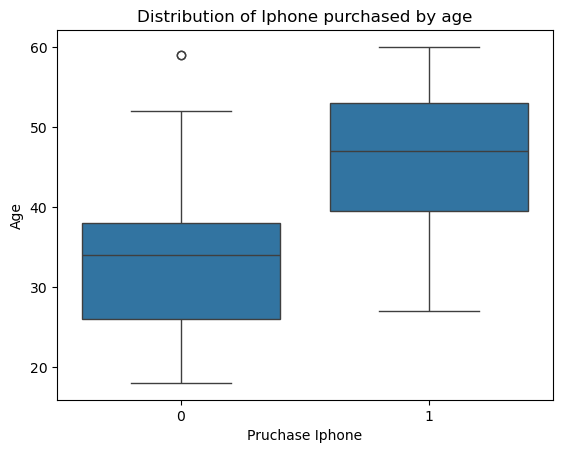

In [46]:
path = 'D:/KNN_Projects'
file_path = os.path.join(path, 'Box_plot_age.png')
sns.boxplot(x = 'Purchase Iphone', y = 'Age', data = df1)
plt.xlabel('Pruchase Iphone')
plt.ylabel('Age')
plt.title('Distribution of Iphone purchased by age')
plt.savefig(file_path)
plt.show()

In [53]:
Q1 = df[(df['Purchase Iphone'] == 0)]['Age'].quantile(0.25)
print(f'The Q1 value is {Q1}')
Q3 = df[(df['Purchase Iphone'] == 0)]['Age'].quantile(0.75)
print(f'The Q3 value is {Q3}')
IQR = Q3 - Q1
print(f'The IQR value is {IQR}')
upper = Q3 + 1.5 * IQR
print(f'The Upper threshold value is {upper}')
lower = Q1 - 1.5 * IQR
print(f'The Lower threshold value is {lower}')

outliers = df1[(df1['Purchase Iphone']==0)& (df1['Age']> upper)]
print(outliers)
df1.loc[outliers.index, 'Purchase Iphone'] = 1

The Q1 value is 26.0
The Q3 value is 38.0
The IQR value is 12.0
The Upper threshold value is 56.0
The Lower threshold value is 8.0
     Gender  Age  Salary  Purchase Iphone  Female  Male
64   Female   59   83000                0       1     0
212  Female   59   42000                0       1     0


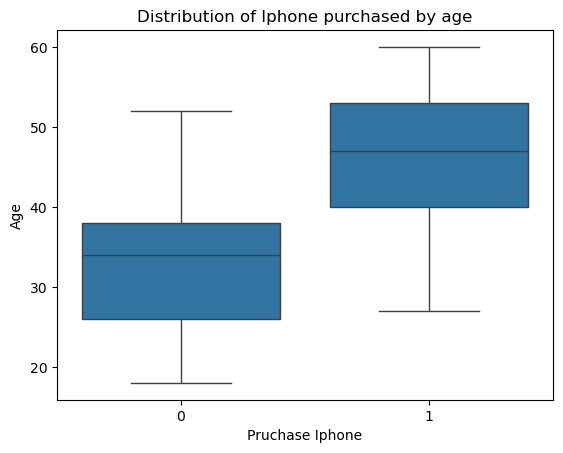

In [54]:
path = 'D:/KNN_Projects'
file_path = os.path.join(path, 'Box_plot_age_after_Imputation.png')
sns.boxplot(x = 'Purchase Iphone', y = 'Age', data = df1)
plt.xlabel('Pruchase Iphone')
plt.ylabel('Age')
plt.title('Distribution of Iphone purchased by age')
plt.savefig(file_path)
plt.show()

In [55]:
# Now there is no outliers in Age

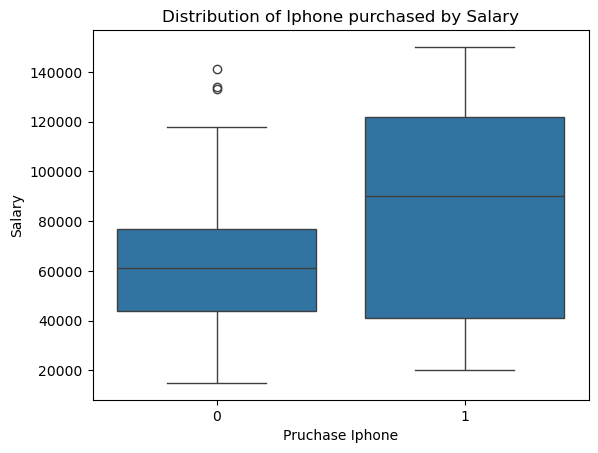

In [56]:
path = 'D:/KNN_Projects'
file_path = os.path.join(path, 'Box_plot_salary.png')
sns.boxplot(x = 'Purchase Iphone', y = 'Salary', data = df1)
plt.xlabel('Pruchase Iphone')
plt.ylabel('Salary')
plt.title('Distribution of Iphone purchased by Salary')
plt.savefig(file_path)
plt.show()

In [57]:
Q1 = df[(df['Purchase Iphone'] == 0)]['Salary'].quantile(0.25)
print(f'The Q1 value is {Q1}')
Q3 = df[(df['Purchase Iphone'] == 0)]['Salary'].quantile(0.75)
print(f'The Q3 value is {Q3}')
IQR = Q3 - Q1
print(f'The IQR value is {IQR}')
upper = Q3 + 1.5 * IQR
print(f'The Upper threshold value is {upper}')
lower = Q1 - 1.5 * IQR
print(f'The Lower threshold value is {lower}')

outliers = df1[(df1['Purchase Iphone']==0)& (df1['Salary']> upper)]
print(outliers)
df1.loc[outliers.index, 'Purchase Iphone'] = 1

The Q1 value is 44000.0
The Q3 value is 77000.0
The IQR value is 33000.0
The Upper threshold value is 126500.0
The Lower threshold value is -5500.0
     Gender  Age  Salary  Purchase Iphone  Female  Male
270  Female   43  133000                0       1     0
284    Male   48  141000                0       0     1
306  Female   51  134000                0       1     0


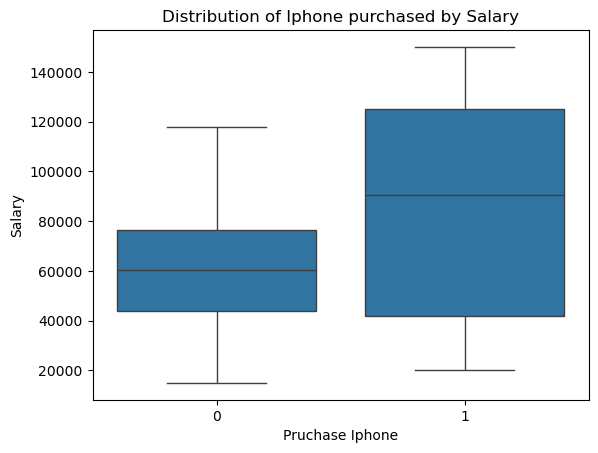

In [58]:
path = 'D:/KNN_Projects'
file_path = os.path.join(path, 'Box_plot_salary_after_imputation.png')
sns.boxplot(x = 'Purchase Iphone', y = 'Salary', data = df1)
plt.xlabel('Pruchase Iphone')
plt.ylabel('Salary')
plt.title('Distribution of Iphone purchased by Salary')
plt.savefig(file_path)
plt.show()

In [ ]:
# There is no outliers in salary

# Count Plot

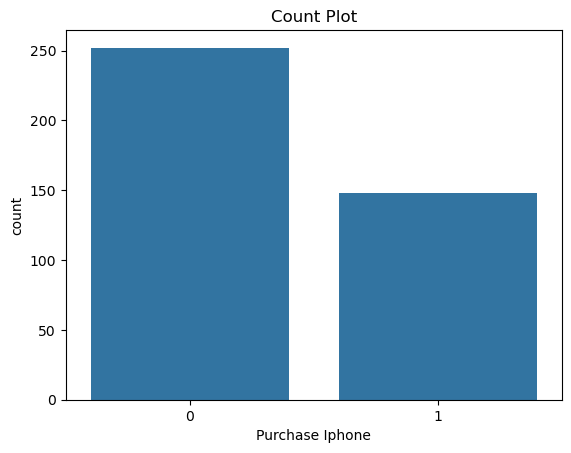

In [59]:
path = 'D:/KNN_Projects'
file_path = os.path.join(path, 'Count_plot.png')
sns.countplot(x= 'Purchase Iphone', data = df1)
plt.title('Count Plot')
plt.savefig(file_path)
plt.show()

# Model Planning

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [61]:
x = df1[['Age', 'Salary', 'Male', 'Female']]

In [62]:
y = df1['Purchase Iphone']

In [161]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=1335)

In [162]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 4), (80, 4), (320,), (80,))

In [163]:
# We are using error method to find the appropiate k-value
error = []
for i in range(1,31):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train, y_train)
    predict_i = clf.predict(x_test)
    error.append(1 - accuracy_score(predict_i, y_test))

In [164]:
error

[0.16249999999999998,
 0.13749999999999996,
 0.13749999999999996,
 0.16249999999999998,
 0.11250000000000004,
 0.13749999999999996,
 0.13749999999999996,
 0.15000000000000002,
 0.15000000000000002,
 0.17500000000000004,
 0.15000000000000002,
 0.15000000000000002,
 0.16249999999999998,
 0.16249999999999998,
 0.17500000000000004,
 0.16249999999999998,
 0.17500000000000004,
 0.17500000000000004,
 0.17500000000000004,
 0.1875,
 0.16249999999999998,
 0.1875,
 0.17500000000000004,
 0.17500000000000004,
 0.16249999999999998,
 0.17500000000000004,
 0.17500000000000004,
 0.16249999999999998,
 0.16249999999999998,
 0.16249999999999998]

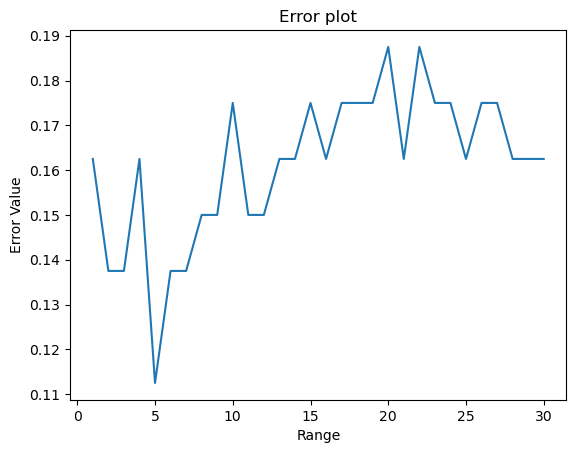

In [165]:
path = 'D:/KNN_Projects'
file_path = os.path.join(path, 'Error_plot.png')
plt.plot(range(1,31), error)
plt.xlabel('Range')
plt.ylabel('Error Value')
plt.title('Error plot')
plt.savefig(file_path)
plt.show()

In [126]:
# Here we can see lower error values for 5

In [166]:
knn = KNeighborsClassifier(n_neighbors=5)

In [167]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [168]:
pred = knn.predict(x_test)

In [169]:
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [170]:
y_test

174    0
295    0
329    1
119    0
68     0
      ..
353    0
181    0
383    1
394    0
118    0
Name: Purchase Iphone, Length: 80, dtype: int64

In [171]:
acc = accuracy_score(pred, y_test)
print(f'The Accuracy score of this model using KNN Classifier is {acc}')

The Accuracy score of this model using KNN Classifier is 0.8875


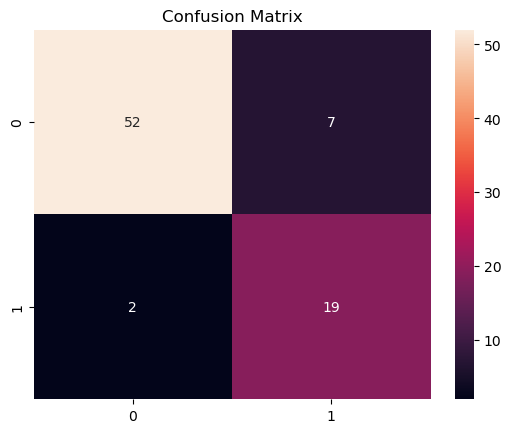

In [172]:
path = 'D:/KNN_Projects'
file_path = os.path.join(path, 'Confusion_Matrix.png')
sns.heatmap(confusion_matrix(pred, y_test), annot=True)
plt.title('Confusion Matrix')
plt.savefig(file_path)
plt.show()

In [173]:
# Out of 80 it predicted 71 correctly and 9 wrongly, with the accuracy score of 88%